If you want to run this code in your browser just click on binder:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ghodsizadeh/learn_ml_with_mehdi/master?filepath=02-Intro%20To%20Scikit-learn%20Classification.ipynb)

For more detail please read the **<a href='https://bit.ly/39d0eeU'> blog_post</a>**

    


In [46]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## Preparing Dataset

Load `iris` dataset from sklearn datasets and check its labels:

In [4]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]] # just get two features of iris dataset, to plot decision boundry
y = iris.target
print('Class Labels', np.unique(y))

Class Labels [0 1 2]


Split dataset to test and train using `sklearn.model_selection.train_test_split`


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1, stratify =y)


> stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset. **so we set stratify to y**

### Preprocessing
Here we standardize Inputs to standard normal distribution. Later we talk about preproccessing.

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


## Preception Classifier

In [30]:
from sklearn.linear_model import Perceptron 
ppn = Perceptron(eta0 = 0.1 , random_state= 1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [32]:
y_pred = ppn.predict(X_test_std)
missclassified_count = (y_test != y_pred).sum()
print(f'Misclassified examples :{missclassified_count} ')

Misclassified examples :1 


Check accuracy

In [40]:
from sklearn.metrics import accuracy_score 

score_from_sk_metrics = accuracy_score(y_test,y_pred)
score_from_model = ppn.score(X_test_std, y_test)

print(f'score from sk.metrics: {score_from_model:.2f}')
print(f'score from model: {score_from_model:.2f}')

score from sk.metrics: 0.98
score from model: 0.98


### Plot decsision regions

In [42]:
from utils import plot_decision_regions

In [44]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

/Users/mehdi/Documents/Git/learn_ml_with_mehdi/utils/decision_plot.py:56: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  X_test, y_test = X[test_idx, :], y[test_idx]


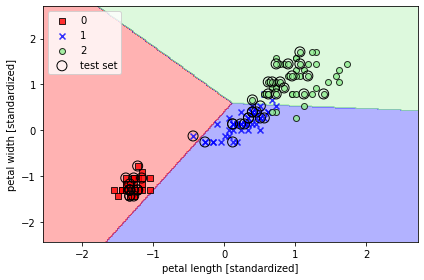

In [47]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

### Logistic Classifier

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( C =100.0, random_state=1, solver='lbfgs',multi_class='ovr')
## uncomment following line to check multi_class option
# lr = LogisticRegression( C =100.0, random_state=1, solver='lbfgs',multi_class='multinomial')

lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

/Users/mehdi/Documents/Git/learn_ml_with_mehdi/utils/decision_plot.py:56: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  X_test, y_test = X[test_idx, :], y[test_idx]


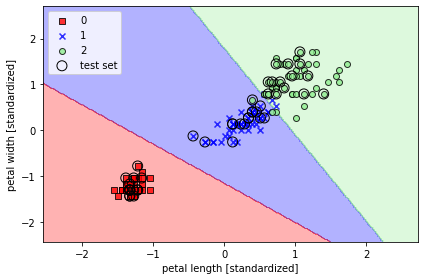

In [52]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()